### Multiplots

Nalgunhas ocasións pode ser útil pintar varias gráficas xuntas, ben por facilitar a programación, ben 
por mostrar diferentes perspectivas dos datos ao mesmo tempo para contrastalas ou descubrir nova información.

Existen diferentes estratexias para facer isto:
- FacetGrid (de Seaborn)
- Subplots (de Matplotlib)

Centrarémonos na segunda opción, a máis común, que utiliza a libraría Matplotlib para construír gráficos múltiples a partir de gráficos individuais.

In [3]:
# Cargamos as librarías
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Para pintar varias gráficas utilizando o método Subplots temos que definir un "grid"
# Indicaremos número de filas e columnas do noso grid para definir o número de gráficas

Text(0.5, 0.98, 'Grid de gráficas - 1x1 ')

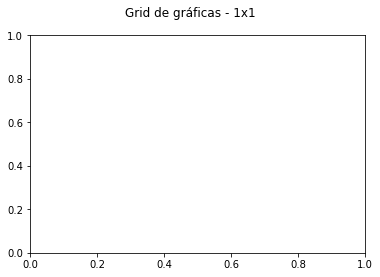

In [27]:
figure, axes = plt.subplots()
figure.suptitle('Grid de gráficas - 1x1 ')

In [28]:
# Fixamos o estilo seaborn
sns.set()

Text(0.5, 0.98, 'Grid de gráficas - 1x1 ')

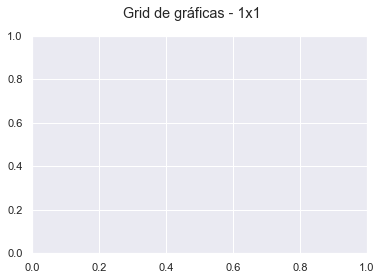

In [29]:
figure, axes = plt.subplots()
figure.suptitle('Grid de gráficas - 1x1 ')

Text(0.5, 1.0, 'segunda gráfica sen datos')

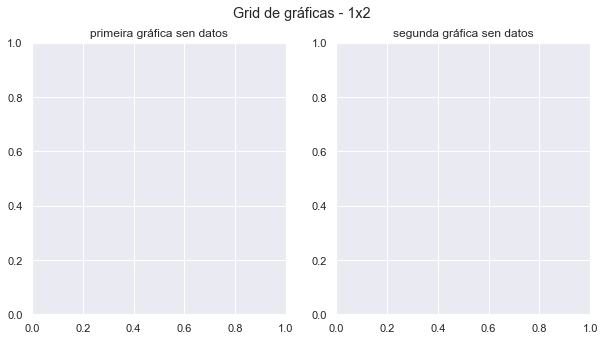

In [31]:
# Argumentos que podemos pasarlle a subplots: 
# filas, columnas
# sharex -> compartir o eixo das x
# sharey -> compartir o eixo das y
# figsize -> tamaño do multiplot
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
figure.suptitle('Grid de gráficas - 1x2')
axes[0].set_title('primeira gráfica sen datos')
axes[1].set_title('segunda gráfica sen datos')

In [33]:
# Cargamos dataset de exemplo: características morfolóxicas das especies Iris
iris = pd.read_csv('../datasets/iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


<AxesSubplot:xlabel='petal.length', ylabel='Proportion'>

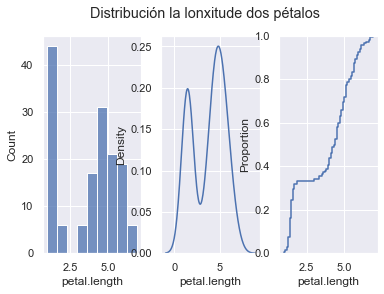

In [43]:
# Podemos visualizar unha variable con gráficas diferentes
# Por exemplo, visualizar a distribución do ancho dos pétalos cas tres gráficas de dispersión (displot)

figure, axes = plt.subplots(1,3)
figure.suptitle('Distribución la lonxitude dos pétalos')

sns.histplot(ax=axes[0], data=iris, x='petal.length')
sns.kdeplot(ax=axes[1], data=iris, x='petal.length')
sns.ecdfplot(ax=axes[2], data=iris, x='petal.length')

Text(0.5, 1.0, 'ECDF - Empirical Cumulative Distribution Function')

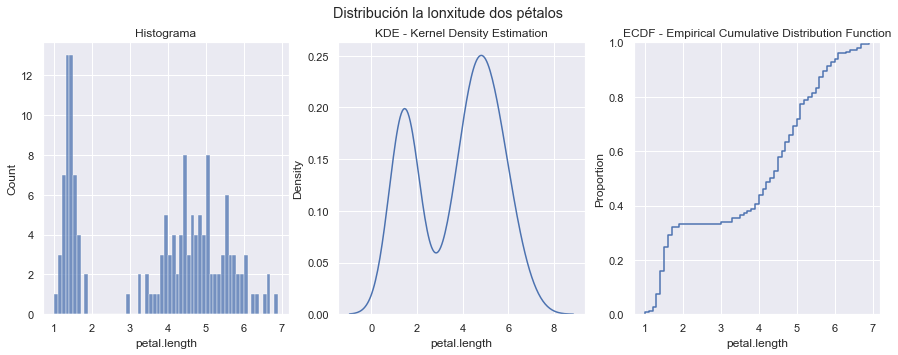

In [50]:
# Axustamos a visualización
figure, axes = plt.subplots(1,3,figsize=(15,5))
figure.suptitle('Distribución la lonxitude dos pétalos')

sns.histplot(ax=axes[0], data=iris, x='petal.length',binwidth=0.1)
axes[0].set_title('Histograma')

sns.kdeplot(ax=axes[1], data=iris, x='petal.length')
axes[1].set_title('KDE - Kernel Density Estimation')

sns.ecdfplot(ax=axes[2], data=iris, x='petal.length')
axes[2].set_title('ECDF - Empirical Cumulative Distribution Function')


<AxesSubplot:xlabel='sepal.width'>

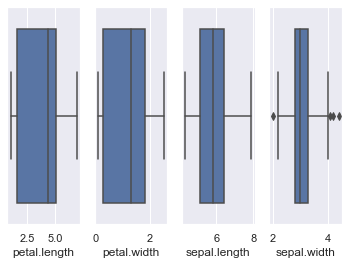

In [53]:
# Tamén podemos utilizar un multiplot para mostrar o mesmo tipo de gráfica sobre diferentes variables
figure, axes = plt.subplots(1,4)

sns.boxplot(ax=axes[0], data=iris, x='petal.length')
sns.boxplot(ax=axes[1], data=iris, x='petal.width')
sns.boxplot(ax=axes[2], data=iris, x='sepal.length')
sns.boxplot(ax=axes[3], data=iris, x='sepal.width')

Text(0.5, 1.0, 'Anchura dos sépalos')

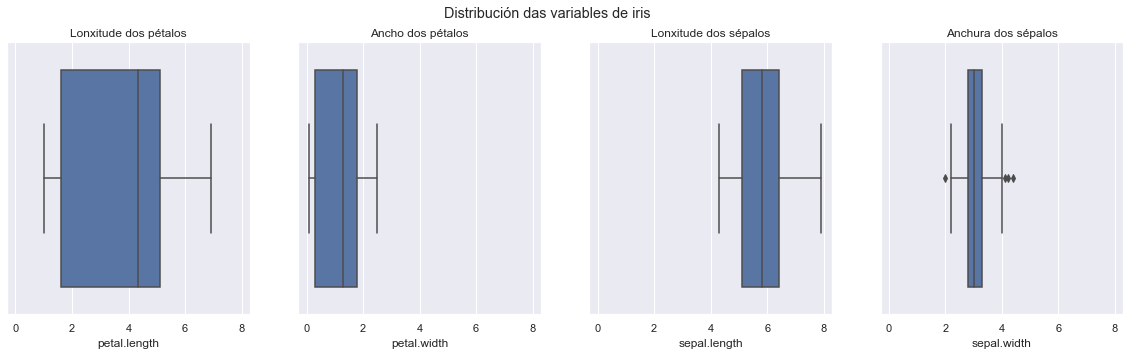

In [58]:
# Axustamos a visualización
figure, axes = plt.subplots(1,4,figsize=(20,5),sharex=True)
figure.suptitle('Distribución das variables de iris')


sns.boxplot(ax=axes[0], data=iris, x='petal.length')
axes[0].set_title('Lonxitude dos pétalos')

sns.boxplot(ax=axes[1], data=iris, x='petal.width')
axes[1].set_title('Ancho dos pétalos')

sns.boxplot(ax=axes[2], data=iris, x='sepal.length')
axes[2].set_title('Lonxitude dos sépalos')

sns.boxplot(ax=axes[3], data=iris, x='sepal.width')
axes[3].set_title('Anchura dos sépalos')

In [59]:
# Podemos combinar diferentes tipos de gráficas sobre diferentes variables nun único multiplot e ademais, automatizar o proceso

In [68]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [73]:
variables_numericas = list(iris.select_dtypes(include=['float64']).columns)
num_vars_num = len(variables_numericas)

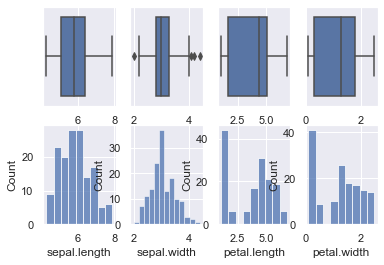

In [74]:
# Tamén podemos utilizar un multiplot para mostrar o mesmo tipo de gráfica sobre diferentes variables
figure, axes = plt.subplots(2,num_vars_num)

i = 0
for campo in variables_numericas:
    sns.boxplot(ax=axes[0,i], data=iris, x=campo)
    sns.histplot(ax=axes[1,i], data=iris, x=campo)
    i = i+1

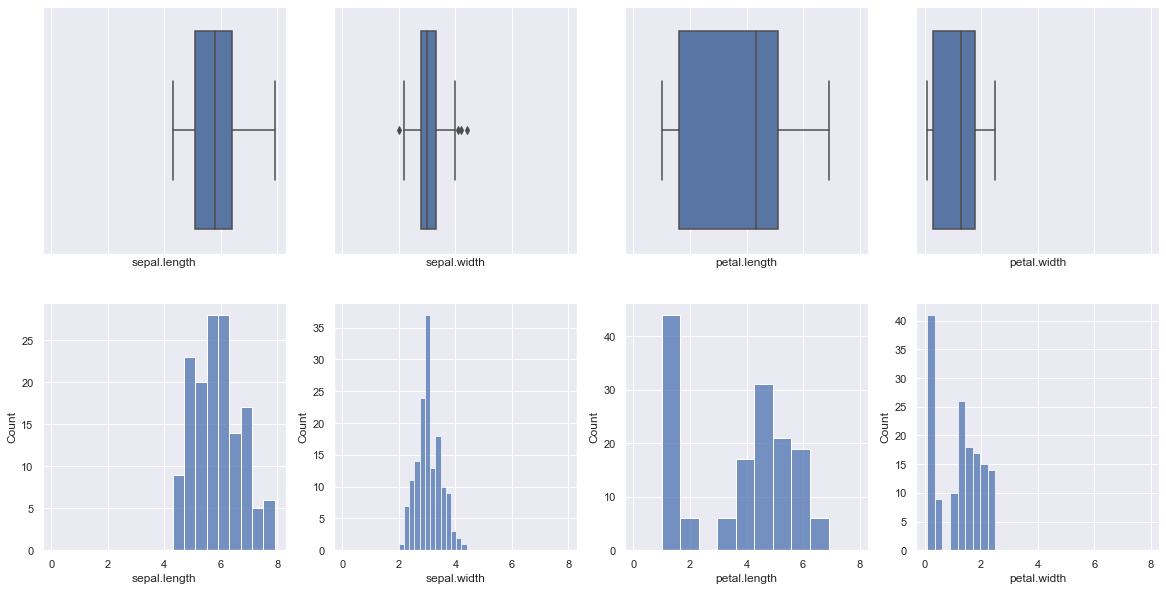

In [76]:
# Axudastamos a configuración
figure, axes = plt.subplots(2,num_vars_num,figsize=(20,10),sharex=True)

i = 0
for campo in variables_numericas:
    sns.boxplot(ax=axes[0,i], data=iris, x=campo)
    sns.histplot(ax=axes[1,i], data=iris, x=campo)
    i = i+1